In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import upsetplot as usp
import matplotlib.pyplot as plt

In [2]:
mdf = pd.read_csv("public-2022-12-11.autolineages.metadata.tsv.gz",sep='\t')
def get_date(d):
    try:
        return dt.datetime.strptime(d,"%Y-%m-%d")
    except:
        return np.nan
mdf['date'] = mdf.date.apply(get_date)
mdf

/Users/jmcbr/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3433: DtypeWarning: Columns (1,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,strain,genbank_accession,date,country,host,completeness,length,Nextstrain_clade,pangolin_lineage,Nextstrain_clade_usher,pango_lineage_usher,auto_annotation
0,100002|LR824035.1|2020-03-05,LR824035.1,2020-03-05,Switzerland,Homo sapiens,NaN,29903.0,20A,B.1,20A,B.1,B.1
1,100003|LR824038.1|2020-03-04,LR824038.1,2020-03-04,Switzerland,Homo sapiens,NaN,29903.0,20B,B.1.1,20B,B.1.1,B.1.1
2,100004|LR824040.1|2020-03-06,LR824040.1,2020-03-06,Switzerland,Homo sapiens,NaN,29903.0,20A,B.1,20A,B.1,B.1
3,100005|LR824037.1|2020-03-06,LR824037.1,2020-03-06,Switzerland,Homo sapiens,NaN,29903.0,20A,B.1,20A,B.1,B.1
4,100006|LR824041.1|2020-03-06,LR824041.1,2020-03-06,Switzerland,Homo sapiens,NaN,29903.0,20A,B.1,20A,B.1,B.1
...,...,...,...,...,...,...,...,...,...,...,...,...
6513444,tiger/USA/Tiger3-VA/2021|MZ305031.1|2021-04-13,MZ305031.1,2021-04-13,USA,Panthera tigris,NaN,29712.0,"20I (Alpha, V1)",B.1.1.7,"20I (Alpha,V1)",B.1.1.7,B.1.1.7
6513445,tiger/USA/tiger-2-040420/2020|MT704313.1|2020-...,MT704313.1,2020-04-04,USA,Panthera tigris,NaN,29872.0,20C,B.1,20C,B.1,B.1
6513446,tiger/USA/tiger-3-040420/2020|MT704315.1|2020-...,MT704315.1,2020-04-04,USA,Panthera tigris,NaN,29863.0,20C,B.1,20C,B.1,B.1
6513447,tiger/USA/tiger-4-040420/2020|MT704316.1|2020-...,MT704316.1,2020-04-04,USA,Panthera tigris,NaN,29834.0,20C,B.1,20C,B.1,B.1


In [3]:
rdf = pd.read_csv("public-2022-12-11.pullreq.report.tsv",sep='\t')
rdf['Earliest Appearance'] = rdf['Earliest Appearance'].apply(get_date)
rdf['Latest Appearance'] = rdf['Latest Appearance'].apply(get_date)
rdf['Exponential Growth Coefficient CI'] = rdf['Exponential Growth Coefficient CI'].apply(lambda x:[float(v) for v in x.strip('[]').split()])
rdf

,Lineage Name,Parent Lineage,Size,Exponential Growth Coefficient CI,Earliest Appearance,Latest Appearance,Regions,Nucleotide Changes,Amino Acid Changes,View On Cov-Spectrum,View On Taxonium (Public Samples Only)
0,auto.BQ.1.1.8.1,BQ.1.1.8,23,"[0.5390764, 1.47610055]",2022-10-25,2022-12-02,England,"G26526T,C29353T,A13581G",M:A2S,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
1,auto.CH.1.1.3,CH.1.1,32,"[0.33259301, 0.75138255]",2022-10-17,2022-12-05,England,"C28093T,C21811T,G13441A",ORF8:S67F,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
2,auto.BQ.1.1.24.1,BQ.1.1.24,102,"[0.32798795, 0.52705619]",2022-11-01,2022-12-03,England,"C5407T,G25459T",ORF3a:A23S,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
3,auto.BN.1.4.1,BN.1.4,183,"[0.22430185, 0.32790468]",2022-10-16,2022-12-03,"England, USA, and Scotland","C14318T,G10364A","ORF1ab:V3367I,ORF1ab:T4685I",[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
4,auto.BQ.1.1.13.1,BQ.1.1.13,65,"[0.21888316, 0.4956386]",2022-10-21,2022-12-04,Scotland and England,G13822A,ORF1ab:V4520I,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
5,auto.BQ.1.1.12,BQ.1.1,176,"[0.21139718, 0.35032038]",2022-10-16,2022-12-03,"USA, Scotland, and England","C19547T,C25821T",ORF1ab:S6428L,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
6,auto.BQ.1.10.2,BQ.1.10,55,"[0.20033469, 0.46204088]",2022-10-17,2022-12-04,USA and England,"A1320C,C3040T,C9286T",ORF1ab:E352A,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
7,auto.BQ.1.5.1,BQ.1.5,71,"[0.18670412, 0.35651012]",2022-10-16,2022-12-05,USA and England,"G25855T,C823T,T8200C",ORF3a:D155Y,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
8,auto.CH.1.1.2.1,CH.1.1.2,16,"[0.12586684, 1.11716398]",2022-10-28,2022-12-02,England,A3569G,ORF1ab:S1102G,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
9,auto.BQ.1.8.3,BQ.1.8,109,"[0.11855458, 0.23465741]",2022-10-17,2022-12-03,England and Northern Ireland,A21137G,ORF1ab:K6958R,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...


Compute some simple statistics.

In [4]:
rdf['Size'].describe()

count     24.000000
mean      82.458333
std       79.335270
min       10.000000
25%       26.500000
50%       45.500000
75%      116.250000
max      299.000000
Name: Size, dtype: float64

In [5]:
rdf['Amino Acid Changes'].apply(lambda x:x.count(":")).describe()

count    24.000000
mean      1.375000
std       0.710939
min       1.000000
25%       1.000000
50%       1.000000
75%       1.250000
max       3.000000
Name: Amino Acid Changes, dtype: float64

In [6]:
rdf['Regions'].apply(lambda x:x.count(",")+1).describe()

count    24.000000
mean      1.166667
std       0.564660
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       3.000000
Name: Regions, dtype: float64

And some statistics related to the models.

In [7]:
rdf['Exponential Growth Coefficient Spread'] = rdf['Exponential Growth Coefficient CI'].apply(lambda x:x[1]) - rdf['Exponential Growth Coefficient CI'].apply(lambda x:x[0])
rdf

,Lineage Name,Parent Lineage,Size,Exponential Growth Coefficient CI,Earliest Appearance,Latest Appearance,Regions,Nucleotide Changes,Amino Acid Changes,View On Cov-Spectrum,View On Taxonium (Public Samples Only),Exponential Growth Coefficient Spread
0,auto.BQ.1.1.8.1,BQ.1.1.8,23,"[0.5390764, 1.47610055]",2022-10-25,2022-12-02,England,"G26526T,C29353T,A13581G",M:A2S,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.937024
1,auto.CH.1.1.3,CH.1.1,32,"[0.33259301, 0.75138255]",2022-10-17,2022-12-05,England,"C28093T,C21811T,G13441A",ORF8:S67F,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.418790
2,auto.BQ.1.1.24.1,BQ.1.1.24,102,"[0.32798795, 0.52705619]",2022-11-01,2022-12-03,England,"C5407T,G25459T",ORF3a:A23S,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.199068
3,auto.BN.1.4.1,BN.1.4,183,"[0.22430185, 0.32790468]",2022-10-16,2022-12-03,"England, USA, and Scotland","C14318T,G10364A","ORF1ab:V3367I,ORF1ab:T4685I",[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.103603
4,auto.BQ.1.1.13.1,BQ.1.1.13,65,"[0.21888316, 0.4956386]",2022-10-21,2022-12-04,Scotland and England,G13822A,ORF1ab:V4520I,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.276755
5,auto.BQ.1.1.12,BQ.1.1,176,"[0.21139718, 0.35032038]",2022-10-16,2022-12-03,"USA, Scotland, and England","C19547T,C25821T",ORF1ab:S6428L,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.138923
6,auto.BQ.1.10.2,BQ.1.10,55,"[0.20033469, 0.46204088]",2022-10-17,2022-12-04,USA and England,"A1320C,C3040T,C9286T",ORF1ab:E352A,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.261706
7,auto.BQ.1.5.1,BQ.1.5,71,"[0.18670412, 0.35651012]",2022-10-16,2022-12-05,USA and England,"G25855T,C823T,T8200C",ORF3a:D155Y,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.169806
8,auto.CH.1.1.2.1,CH.1.1.2,16,"[0.12586684, 1.11716398]",2022-10-28,2022-12-02,England,A3569G,ORF1ab:S1102G,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.991297
9,auto.BQ.1.8.3,BQ.1.8,109,"[0.11855458, 0.23465741]",2022-10-17,2022-12-03,England and Northern Ireland,A21137G,ORF1ab:K6958R,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.116103


In [14]:
rdf['Exponential Growth Coefficient Spread'].describe()

count    24.000000
mean      0.419879
std       0.382475
min       0.035790
25%       0.122170
50%       0.284619
75%       0.602068
max       1.539686
Name: Exponential Growth Coefficient Spread, dtype: float64

<AxesSubplot: xlabel='Size', ylabel='Exponential Growth Coefficient Spread'>

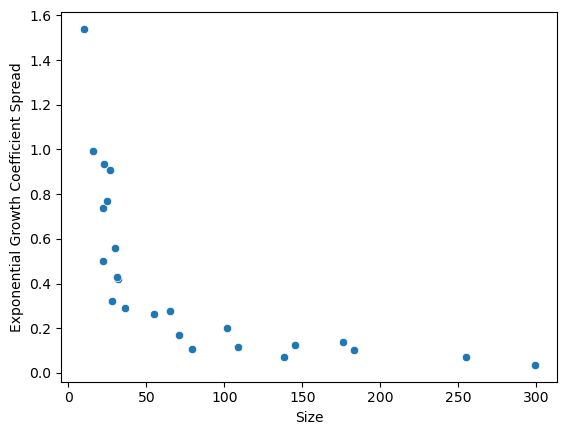

In [8]:
sns.scatterplot(x='Size',y='Exponential Growth Coefficient Spread',data=rdf)

In [15]:
rdf['Exponential Growth Coefficient Spread'].describe()

count    24.000000
mean      0.419879
std       0.382475
min       0.035790
25%       0.122170
50%       0.284619
75%       0.602068
max       1.539686
Name: Exponential Growth Coefficient Spread, dtype: float64

In [16]:
rdf[rdf.Size > 50]['Exponential Growth Coefficient Spread'].describe()

count    12.000000
mean      0.139760
std       0.074651
min       0.035790
25%       0.095577
50%       0.120147
75%       0.177122
max       0.276755
Name: Exponential Growth Coefficient Spread, dtype: float64

In [19]:
rdf[rdf.Size > 50]['Exponential Growth Coefficient CI'].apply(lambda x:x[0]).describe()

count    12.000000
mean      0.151616
std       0.096616
min      -0.047466
25%       0.100191
50%       0.152629
75%       0.213269
max       0.327988
Name: Exponential Growth Coefficient CI, dtype: float64

In [20]:
rdf[rdf.Size > 50]['Exponential Growth Coefficient CI'].apply(lambda x:x[1]).describe()

count    12.000000
mean      0.291376
std       0.152673
min       0.060773
25%       0.154097
50%       0.282420
75%       0.382893
max       0.527056
Name: Exponential Growth Coefficient CI, dtype: float64

The size of the lineage and the spread of the inferred distribution are, naturally, correlated- the exponentially larger the lineage, the narrower and more accurate the estimate of the coefficient of exponential growth is. Generally, lineages of at least fifty or so samples have reliable inference of growth rates.

In [9]:
minimums = rdf['Exponential Growth Coefficient CI'].apply(lambda x:x[0])
minimums.describe()

count    24.000000
mean      0.071364
std       0.228311
min      -0.564870
25%      -0.013789
50%       0.104404
75%       0.203100
max       0.539076
Name: Exponential Growth Coefficient CI, dtype: float64

The lower quantile bound can be considered an extremely conservative estimate of the rate of exponential growth. If this value is positive, the lineage is very likely to be growing consistently and outcompeting other circulating lineages. 16 of our 24 lineages exhibit a confident estimate of positive growth. 

In [13]:
rdf.iloc[minimums[minimums > 0].index]

,Lineage Name,Parent Lineage,Size,Exponential Growth Coefficient CI,Earliest Appearance,Latest Appearance,Regions,Nucleotide Changes,Amino Acid Changes,View On Cov-Spectrum,View On Taxonium (Public Samples Only),Exponential Growth Coefficient Spread
0,auto.BQ.1.1.8.1,BQ.1.1.8,23,"[0.5390764, 1.47610055]",2022-10-25,2022-12-02,England,"G26526T,C29353T,A13581G",M:A2S,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.937024
1,auto.CH.1.1.3,CH.1.1,32,"[0.33259301, 0.75138255]",2022-10-17,2022-12-05,England,"C28093T,C21811T,G13441A",ORF8:S67F,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.418790
2,auto.BQ.1.1.24.1,BQ.1.1.24,102,"[0.32798795, 0.52705619]",2022-11-01,2022-12-03,England,"C5407T,G25459T",ORF3a:A23S,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.199068
3,auto.BN.1.4.1,BN.1.4,183,"[0.22430185, 0.32790468]",2022-10-16,2022-12-03,"England, USA, and Scotland","C14318T,G10364A","ORF1ab:V3367I,ORF1ab:T4685I",[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.103603
4,auto.BQ.1.1.13.1,BQ.1.1.13,65,"[0.21888316, 0.4956386]",2022-10-21,2022-12-04,Scotland and England,G13822A,ORF1ab:V4520I,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.276755
5,auto.BQ.1.1.12,BQ.1.1,176,"[0.21139718, 0.35032038]",2022-10-16,2022-12-03,"USA, Scotland, and England","C19547T,C25821T",ORF1ab:S6428L,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.138923
6,auto.BQ.1.10.2,BQ.1.10,55,"[0.20033469, 0.46204088]",2022-10-17,2022-12-04,USA and England,"A1320C,C3040T,C9286T",ORF1ab:E352A,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.261706
7,auto.BQ.1.5.1,BQ.1.5,71,"[0.18670412, 0.35651012]",2022-10-16,2022-12-05,USA and England,"G25855T,C823T,T8200C",ORF3a:D155Y,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.169806
8,auto.CH.1.1.2.1,CH.1.1.2,16,"[0.12586684, 1.11716398]",2022-10-28,2022-12-02,England,A3569G,ORF1ab:S1102G,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.991297
9,auto.BQ.1.8.3,BQ.1.8,109,"[0.11855458, 0.23465741]",2022-10-17,2022-12-03,England and Northern Ireland,A21137G,ORF1ab:K6958R,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...,0.116103


Conversely, the upper value represents our least conservative estimate of growth- the highest growth value that could reasonably explain the data.

In [11]:
maximums = rdf['Exponential Growth Coefficient CI'].apply(lambda x:x[1])
maximums.describe()

count    24.000000
mean      0.491243
std       0.339878
min       0.060773
25%       0.236366
50%       0.429031
75%       0.630438
max       1.476101
Name: Exponential Growth Coefficient CI, dtype: float64

In [12]:
rdf.iloc[maximums[maximums < 0].index]

,Lineage Name,Parent Lineage,Size,Exponential Growth Coefficient CI,Earliest Appearance,Latest Appearance,Regions,Nucleotide Changes,Amino Acid Changes,View On Cov-Spectrum,View On Taxonium (Public Samples Only),Exponential Growth Coefficient Spread


None of our lineage designations appear to be definitively in decline, though 8 have an estimated range which overlaps 0 or negative growth values.